In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler


In [2]:
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
noun_sentence_df_final_joined_df_selected_columns_use_min = pd.\
    read_feather('noun_sentence_df_final_joined_df_selected_columns_use_min.fea')

In [4]:
noun_sentence_df_final_joined_df_selected_columns_use_min = noun_sentence_df_final_joined_df_selected_columns_use_min.dropna()

In [5]:
noun_sentence_df_final_joined_df_selected_columns_use_min.columns

Index(['level_0', 'listingid', 'index', 'AVM_Error_List', 'Listing_Error_List',
       'AVM_Error_List_count', 'Transdate', 'Transprice', 'total_value',
       'cj_living_area', 'effective_year_built', 'story', 'ListingPrice',
       'avmValue', 'avmerror', 'AVM_Error_Indicators_0',
       'AVM_Error_Indicators_1', 'AVM_Error_Indicators_2',
       'AVM_Error_Indicators_3', 'AVM_Error_Indicators_4',
       'AVM_Error_Indicators_5', 'AVM_Error_Indicators_6',
       'AVM_Error_Indicators_7', 'AVM_Error_Indicators_8',
       'AVM_Error_Indicators_9', 'AVM_Error_Indicators_10',
       'AVM_Error_Indicators_11',
       'clean_publicremarks_additional_words_vaderpolarity_0',
       'clean_publicremarks_additional_words_vaderpolarity_1',
       'clean_publicremarks_additional_words_vaderpolarity_2',
       'clean_publicremarks_additional_words_vaderpolarity_3',
       'AVM_Error_Indicators_scale', 'transaction_year'],
      dtype='object')

In [6]:
predictor_columns = [ 'cj_living_area',
       'avmValue', 'AVM_Error_Indicators_0',
       'AVM_Error_Indicators_1', 'AVM_Error_Indicators_2',
       'AVM_Error_Indicators_3', 'AVM_Error_Indicators_4',
       'AVM_Error_Indicators_5', 'AVM_Error_Indicators_6',
       'AVM_Error_Indicators_7', 'AVM_Error_Indicators_8',
       'AVM_Error_Indicators_9', 'AVM_Error_Indicators_10',
       'AVM_Error_Indicators_11',
       'clean_publicremarks_additional_words_vaderpolarity_0',
       'clean_publicremarks_additional_words_vaderpolarity_1',
       'clean_publicremarks_additional_words_vaderpolarity_2',
       'clean_publicremarks_additional_words_vaderpolarity_3',
       'AVM_Error_Indicators_scale']

In [7]:
predictor_columns = ['AVM_Error_Indicators_4',
                 'clean_publicremarks_additional_words_vaderpolarity_2',
                 'clean_publicremarks_additional_words_vaderpolarity_3',
                 'AVM_Error_Indicators_5',
                 'clean_publicremarks_additional_words_vaderpolarity_0',
                 'cj_living_area',
                 'AVM_Error_Indicators_0',
                 'avmValue']

In [8]:
Predictors = noun_sentence_df_final_joined_df_selected_columns_use_min.loc[:,predictor_columns].to_numpy()

In [9]:
Predictors.shape

(626428, 8)

In [10]:
predictand = noun_sentence_df_final_joined_df_selected_columns_use_min.avmerror.values

In [11]:
predictand.shape

(626428,)

In [12]:
train_samples = 300000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [152]:
np.max(X_train)

5233111.71

In [88]:
model = ExtraTreesRegressor(n_estimators = 60,  min_samples_leaf=50, 
                              max_features = 6, max_depth=15, min_samples_split =100)

In [89]:
model.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=15, max_features=6, min_samples_leaf=50,
                    min_samples_split=100, n_estimators=60)

In [90]:
print(model.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 15, 'max_features': 6, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 50, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 60, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [91]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [92]:
y_train.min()

-1.4996102222222225

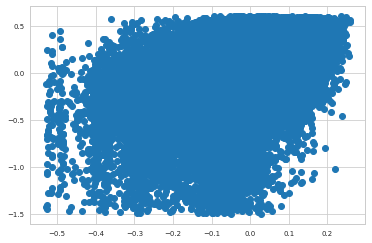

In [93]:
plt.plot(predictions_train,y_train,'o')

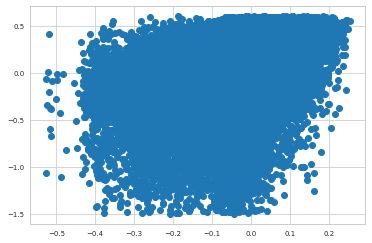

In [94]:
plt.plot(predictions_test,y_test,'o')

In [95]:
df = noun_sentence_df_final_joined_df_selected_columns_use_min.copy()


In [96]:
predictions_test_value = df['avmValue'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue'].values[:train_samples]/(1-predictions_train)
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [97]:
print(df.head(1)['avmValue'])
print(df.head(1)['Transprice'])
print(df.head(1)['avmerror'])
print(df.head(1)['avmValue']+df.head(1)['avmerror']*df.head(1)['avmValue'])
print((df.head(1)['Transprice']-df.head(1)['avmValue'])/df.head(1)['Transprice'])

0    135660.77
Name: avmValue, dtype: float64
0    150000.0
Name: Transprice, dtype: float64
0    0.095595
Name: avmerror, dtype: float64
0    148629.24322
dtype: float64
0    0.095595
dtype: float64


In [98]:
df.columns

Index(['level_0', 'listingid', 'index', 'AVM_Error_List', 'Listing_Error_List',
       'AVM_Error_List_count', 'Transdate', 'Transprice', 'total_value',
       'cj_living_area', 'effective_year_built', 'story', 'ListingPrice',
       'avmValue', 'avmerror', 'AVM_Error_Indicators_0',
       'AVM_Error_Indicators_1', 'AVM_Error_Indicators_2',
       'AVM_Error_Indicators_3', 'AVM_Error_Indicators_4',
       'AVM_Error_Indicators_5', 'AVM_Error_Indicators_6',
       'AVM_Error_Indicators_7', 'AVM_Error_Indicators_8',
       'AVM_Error_Indicators_9', 'AVM_Error_Indicators_10',
       'AVM_Error_Indicators_11',
       'clean_publicremarks_additional_words_vaderpolarity_0',
       'clean_publicremarks_additional_words_vaderpolarity_1',
       'clean_publicremarks_additional_words_vaderpolarity_2',
       'clean_publicremarks_additional_words_vaderpolarity_3',
       'AVM_Error_Indicators_scale', 'transaction_year'],
      dtype='object')

In [99]:
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples]- df['avmValue'].values[:train_samples])/\
              (df['Transprice'].values[:train_samples])))


0.12005937691049187
0.12824339216917896


In [100]:
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:]- df['avmValue'].values[train_samples:])/\
              (df['Transprice'].values[train_samples:])))


0.1158601617150967
0.12321237259476342


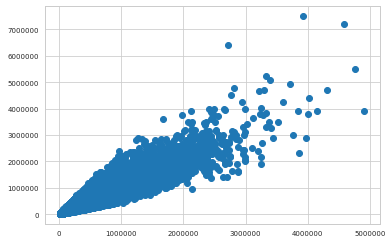

In [101]:
plt.plot(predictions_train_value,df['Transprice'].values[:train_samples],'o')

In [102]:
df.columns

Index(['level_0', 'listingid', 'index', 'AVM_Error_List', 'Listing_Error_List',
       'AVM_Error_List_count', 'Transdate', 'Transprice', 'total_value',
       'cj_living_area', 'effective_year_built', 'story', 'ListingPrice',
       'avmValue', 'avmerror', 'AVM_Error_Indicators_0',
       'AVM_Error_Indicators_1', 'AVM_Error_Indicators_2',
       'AVM_Error_Indicators_3', 'AVM_Error_Indicators_4',
       'AVM_Error_Indicators_5', 'AVM_Error_Indicators_6',
       'AVM_Error_Indicators_7', 'AVM_Error_Indicators_8',
       'AVM_Error_Indicators_9', 'AVM_Error_Indicators_10',
       'AVM_Error_Indicators_11',
       'clean_publicremarks_additional_words_vaderpolarity_0',
       'clean_publicremarks_additional_words_vaderpolarity_1',
       'clean_publicremarks_additional_words_vaderpolarity_2',
       'clean_publicremarks_additional_words_vaderpolarity_3',
       'AVM_Error_Indicators_scale', 'transaction_year'],
      dtype='object')

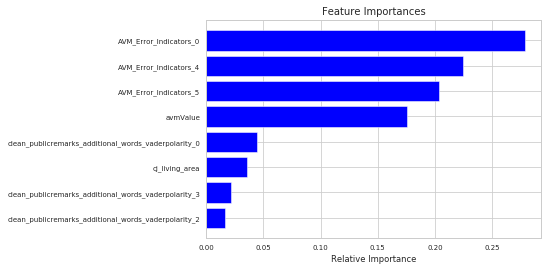

In [87]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

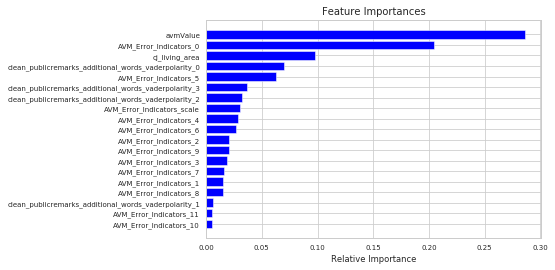

In [43]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [44]:
[features[i] for i in indices]

['AVM_Error_Indicators_10',
 'AVM_Error_Indicators_11',
 'clean_publicremarks_additional_words_vaderpolarity_1',
 'AVM_Error_Indicators_8',
 'AVM_Error_Indicators_1',
 'AVM_Error_Indicators_7',
 'AVM_Error_Indicators_3',
 'AVM_Error_Indicators_9',
 'AVM_Error_Indicators_2',
 'AVM_Error_Indicators_6',
 'AVM_Error_Indicators_4',
 'AVM_Error_Indicators_scale',
 'clean_publicremarks_additional_words_vaderpolarity_2',
 'clean_publicremarks_additional_words_vaderpolarity_3',
 'AVM_Error_Indicators_5',
 'clean_publicremarks_additional_words_vaderpolarity_0',
 'cj_living_area',
 'AVM_Error_Indicators_0',
 'avmValue']

In [103]:
import joblib
filename = 'ExtraT_newmodel_01_newset.sav'
joblib.dump(model,filename)

['ExtraT_newmodel_01_newset.sav']